In [367]:
# import
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
df= pd.read_csv('../excercises/Data/diabetes.csv')

In [ ]:
#checking for null-values
df.isnull().sum()
#0 null-values

In [ ]:
#idea of general looks of data
df.head()

In [ ]:
print(df.describe())

In [ ]:
#as the parameter DiabetesPedigreeFunction is such a long typing process a variable is instanciated instead
DPF='DiabetesPedigreeFunction'

In [ ]:
#Making a median of some of the parameters, as there's some 0-values (not null values!) and replacing them in the dataframe
median_blood_pressure = df[df['BloodPressure'] != 0]['BloodPressure'].median()

df['BloodPressure'] = df['BloodPressure'].replace(0, median_blood_pressure)

median_BMI = df[df['BMI'] != 0]['BMI'].median()

df['BMI'] = df['BMI'].replace(0, median_BMI)

median_insulin = df[df['Insulin'] != 0]['Insulin'].median()

df['Insulin'] = df['Insulin'].replace(0, median_insulin)

median_glucose = df[df['Glucose'] != 0]['Glucose'].median()

df['Glucose'] = df['Glucose'].replace(0, median_glucose)

median_skin_thickness = df[df['SkinThickness'] != 0]['SkinThickness'].median()

df['SkinThickness'] = df['SkinThickness'].replace(0, median_skin_thickness)




In [ ]:
# Split the data into features and target variable
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = df[feature_cols]
y = df['Outcome']


In [ ]:
#Which is better?
#from sklearn.preprocessing import StandardScaler
#sTool = StandardScaler()
#X_scaled = sTool.fit_transform(X)


In [ ]:
#X_scaled

In [328]:
X_standardized=(X-X.mean())/X.std()

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=123)

<Figure size 1600x400 with 0 Axes>

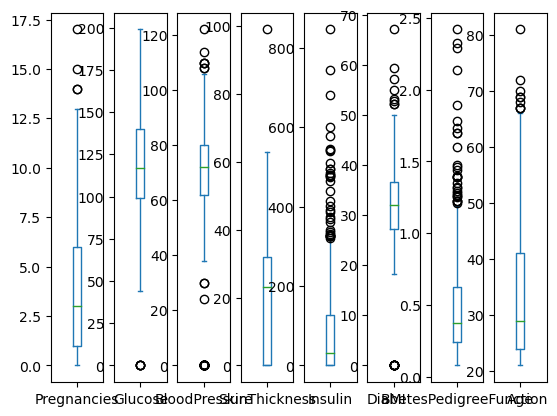

In [348]:
#Very hard to read. but order is:
#Pregnancies. Glucose, BloodPressure,SkinThickness,Insulin,BMI, DPF, Age

df_without_outcome = df.drop(columns=['Outcome'])

# Set a larger figure size
plt.figure(figsize=(16, 4))  # Adjust the width (16) to your preference

df_without_outcome.plot(kind='box', subplots=True, layout=(1, 8), sharex=False, sharey=False)
plt.show()

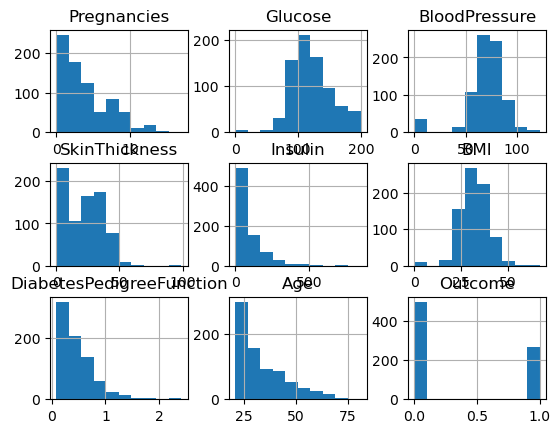

In [349]:
df.hist()
plt.show()

<Figure size 1200x1200 with 0 Axes>

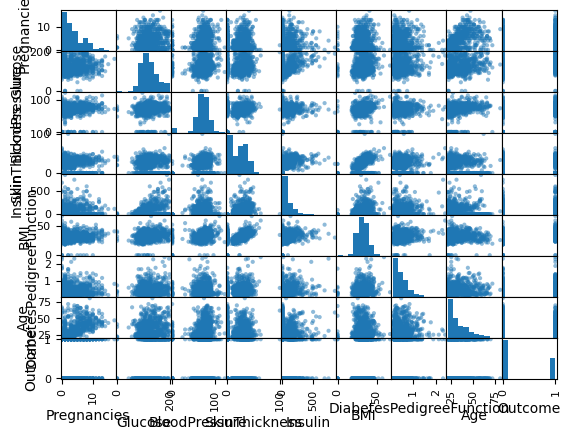

In [354]:
#Unable to adjust size?

# Set a larger figure size
plt.figure(figsize=(12, 12))  # Adjust the size (e.g., 12x12) to your preference

scatter_matrix(df, alpha=0.5, diagonal='hist')  # Adjust other parameters as needed
plt.show()


In [357]:
test_set_size = 0.2

# Initial value for randomization
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_standardized, y, test_size=test_set_size, random_state=seed)

# BAYES

In [360]:
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [361]:
model.score(X_test, Y_test)

0.7532467532467533

In [362]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,-0.844335,-0.966281,-0.367098,-0.535127,-0.319318,-0.607874,0.326334,-0.785774
236,0.936304,1.879904,0.769512,0.029058,0.973591,0.495604,0.344443,1.510099
323,2.716942,0.972878,1.079497,0.781305,-0.440799,-0.658609,0.782075,0.829840
98,0.639530,-0.872451,-0.987066,0.593243,-0.137096,-0.417619,-0.349732,-0.870806
701,0.639530,0.128406,0.459528,0.655930,-0.692439,-0.557140,0.281061,1.340034
...,...,...,...,...,...,...,...,...
153,-0.844335,1.004155,0.666184,1.345490,3.516023,1.091736,0.649276,-0.870806
392,-0.844335,0.316066,-0.263769,-0.409752,2.908616,-1.051802,-0.250133,-1.040871
308,-1.141108,0.222236,-0.057113,-0.096316,0.869464,-0.189314,2.774055,-0.700742
70,-0.547562,-0.653513,-0.160441,-0.033629,0.088512,0.115094,1.192543,-0.445645


In [363]:
prediction = model.predict(X_test)
prediction

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0],
      dtype=int64)

In [364]:
prediction.shape

(154,)

In [365]:
# Set the metrics
scoring = 'accuracy'

In [368]:
# Calculated accuracy of the model over the validation set
print(accuracy_score(Y_test, prediction))

0.7532467532467533


In [369]:
#quite high precision on false slightly lower on true
cmat = confusion_matrix(Y_test, prediction)
print(cmat)
print(classification_report(Y_test, prediction))

[[78 19]
 [19 38]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        97
           1       0.67      0.67      0.67        57

    accuracy                           0.75       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.75      0.75      0.75       154



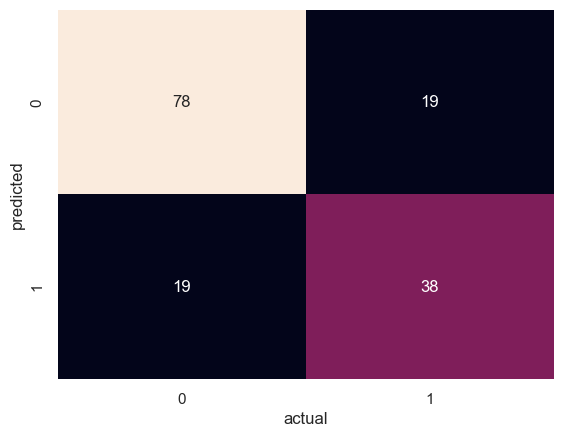

In [375]:
#as seen below the true positive and true negative is much bigger compared to the false negative and false positive.
names = []
sns.set()
sns.heatmap(cmat.T, square=False, annot=True, cbar=False)
plt.xlabel('actual')
plt.ylabel('predicted');
plt.show()
